# Perform Data cleaning and EDA on dataset. Explore the relationship between variables and identify patterns and trend in data

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## Import Dataset

In [32]:
df = pd.read_csv('train.csv')

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Check null values percentage

In [35]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Existence of Missing Values

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [39]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['HasCabin']=df['Cabin'].notnull().astype(int)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\NIHAL SUTAR\AppData\Local\Temp\ipykernel_15876\904694215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\NIHAL SUTAR\AppData\Local\Temp\ipykernel_15876\904694215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

## Exploratory Data Analysis (EDA)

### Countplot

Survived
0    549
1    342
Name: count, dtype: int64

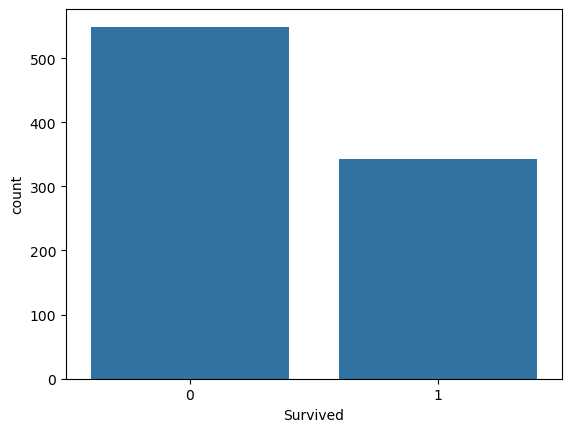

In [42]:
sns.countplot(x='Survived',data = df)
df['Survived'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

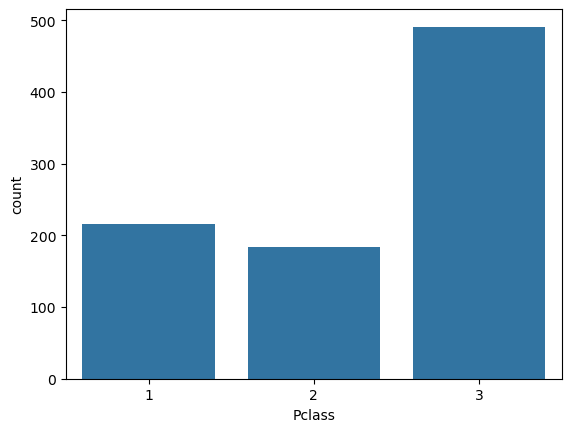

In [43]:
sns.countplot(x='Pclass',data=df)
df['Pclass'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

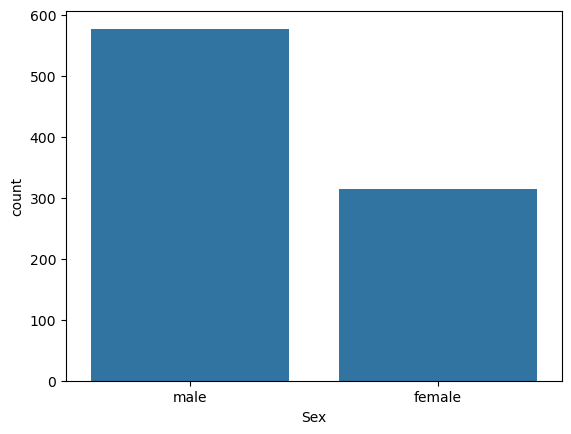

In [44]:
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

### Piechart

<Axes: ylabel='count'>

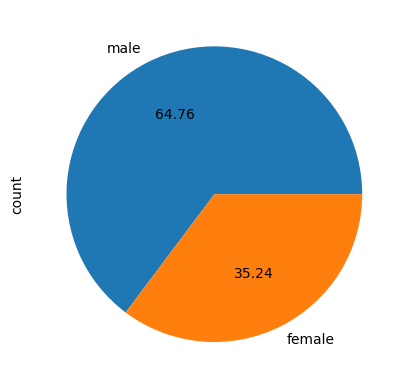

In [46]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

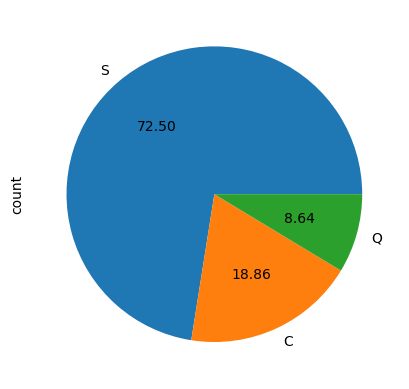

In [47]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

### Histogram

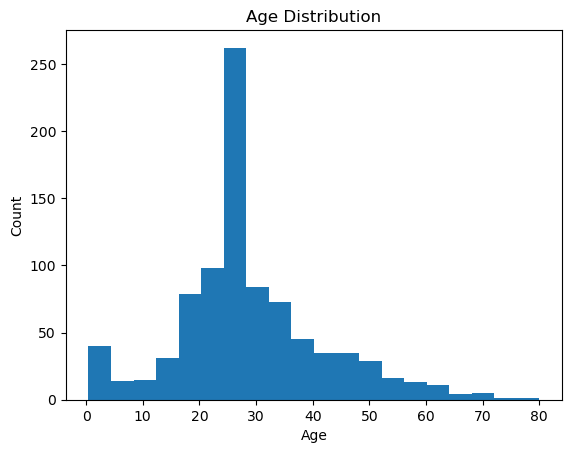

In [49]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

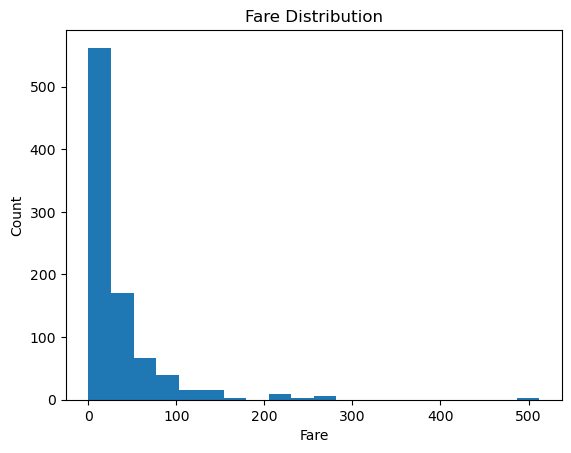

In [50]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [51]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = df.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by Sex:\n{sex_survived}")


Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


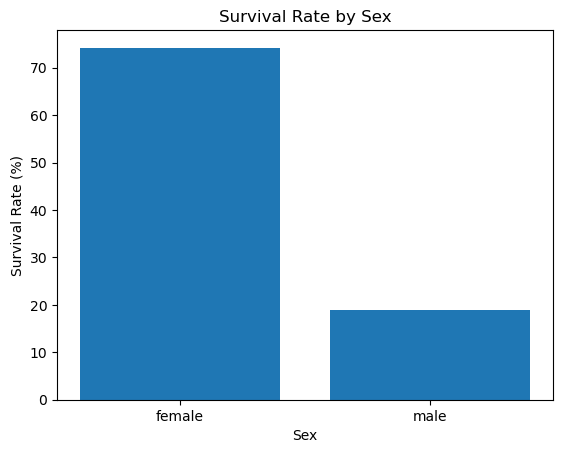

In [52]:
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

### Distplot/Histplot

<Axes: xlabel='Age', ylabel='Count'>

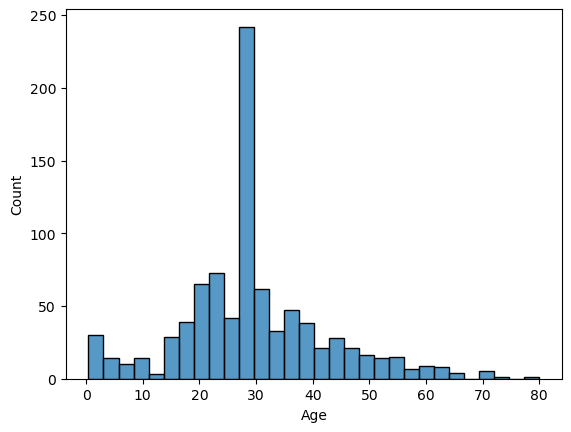

In [54]:
sns.histplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

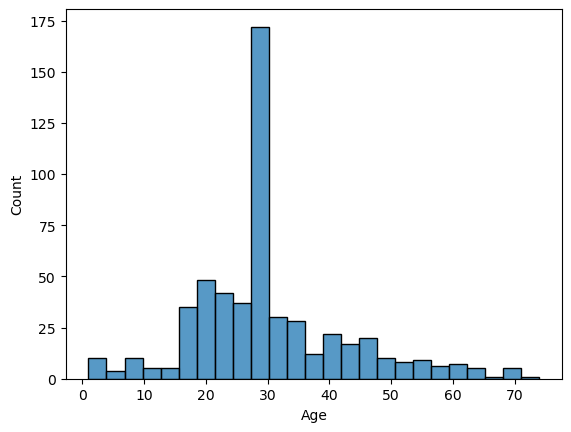

In [55]:
sns.histplot(df[df['Survived']==0]['Age'])

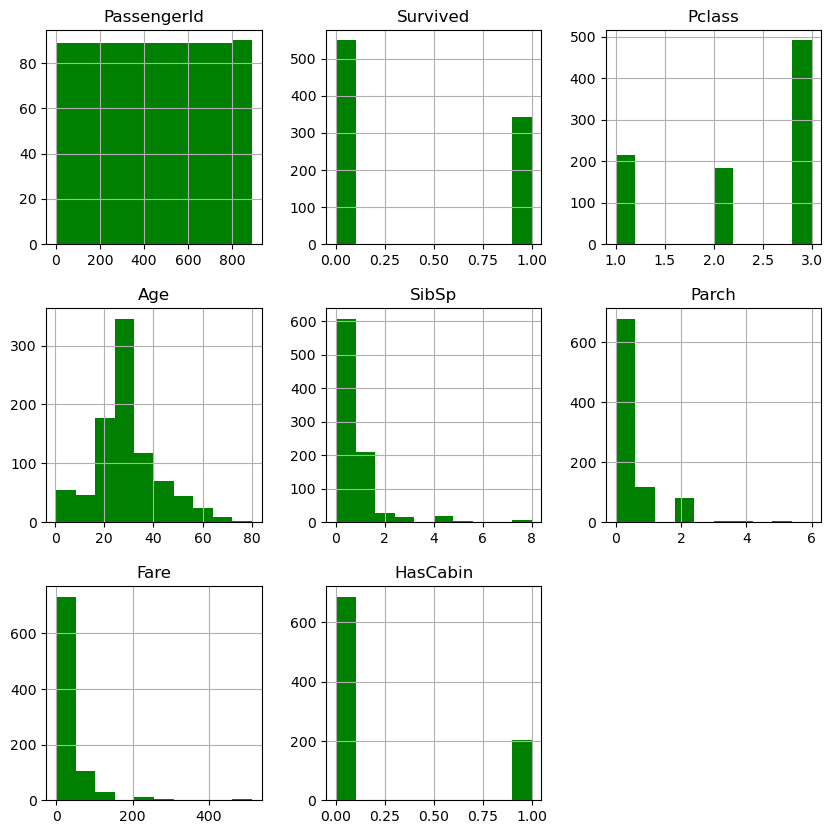

In [56]:
df.hist(figsize=(10,10),color='green')
plt.show()

C:\Users\NIHAL SUTAR\AppData\Local\Temp\ipykernel_15876\455601345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'],hist=False)
C:\Users\NIHAL SUTAR\AppData\Local\Temp\ipykernel_15876\455601345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

<Axes: xlabel='Age', ylabel='Density'>

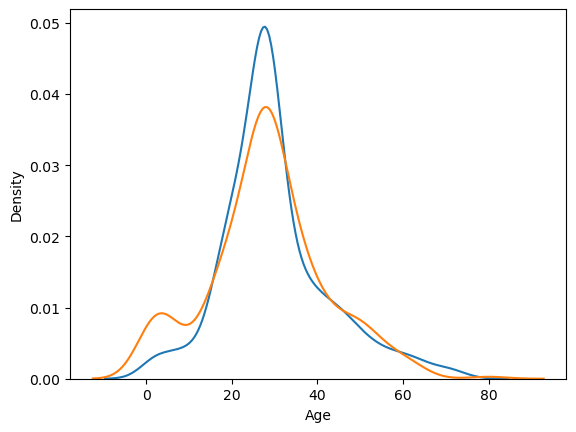

In [57]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)

### Boxplot

<Axes: ylabel='Age'>

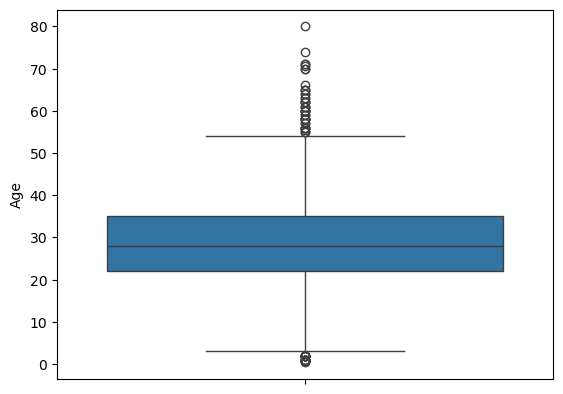

In [59]:
sns.boxplot(df['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

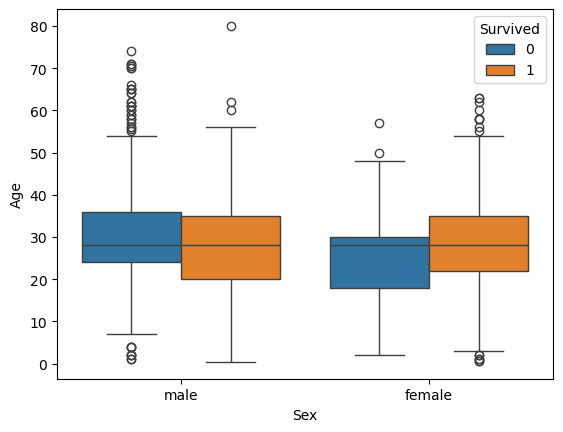

In [60]:
sns.boxplot(x=df['Sex'],y=df['Age'], hue=df['Survived'])

### Pairplot

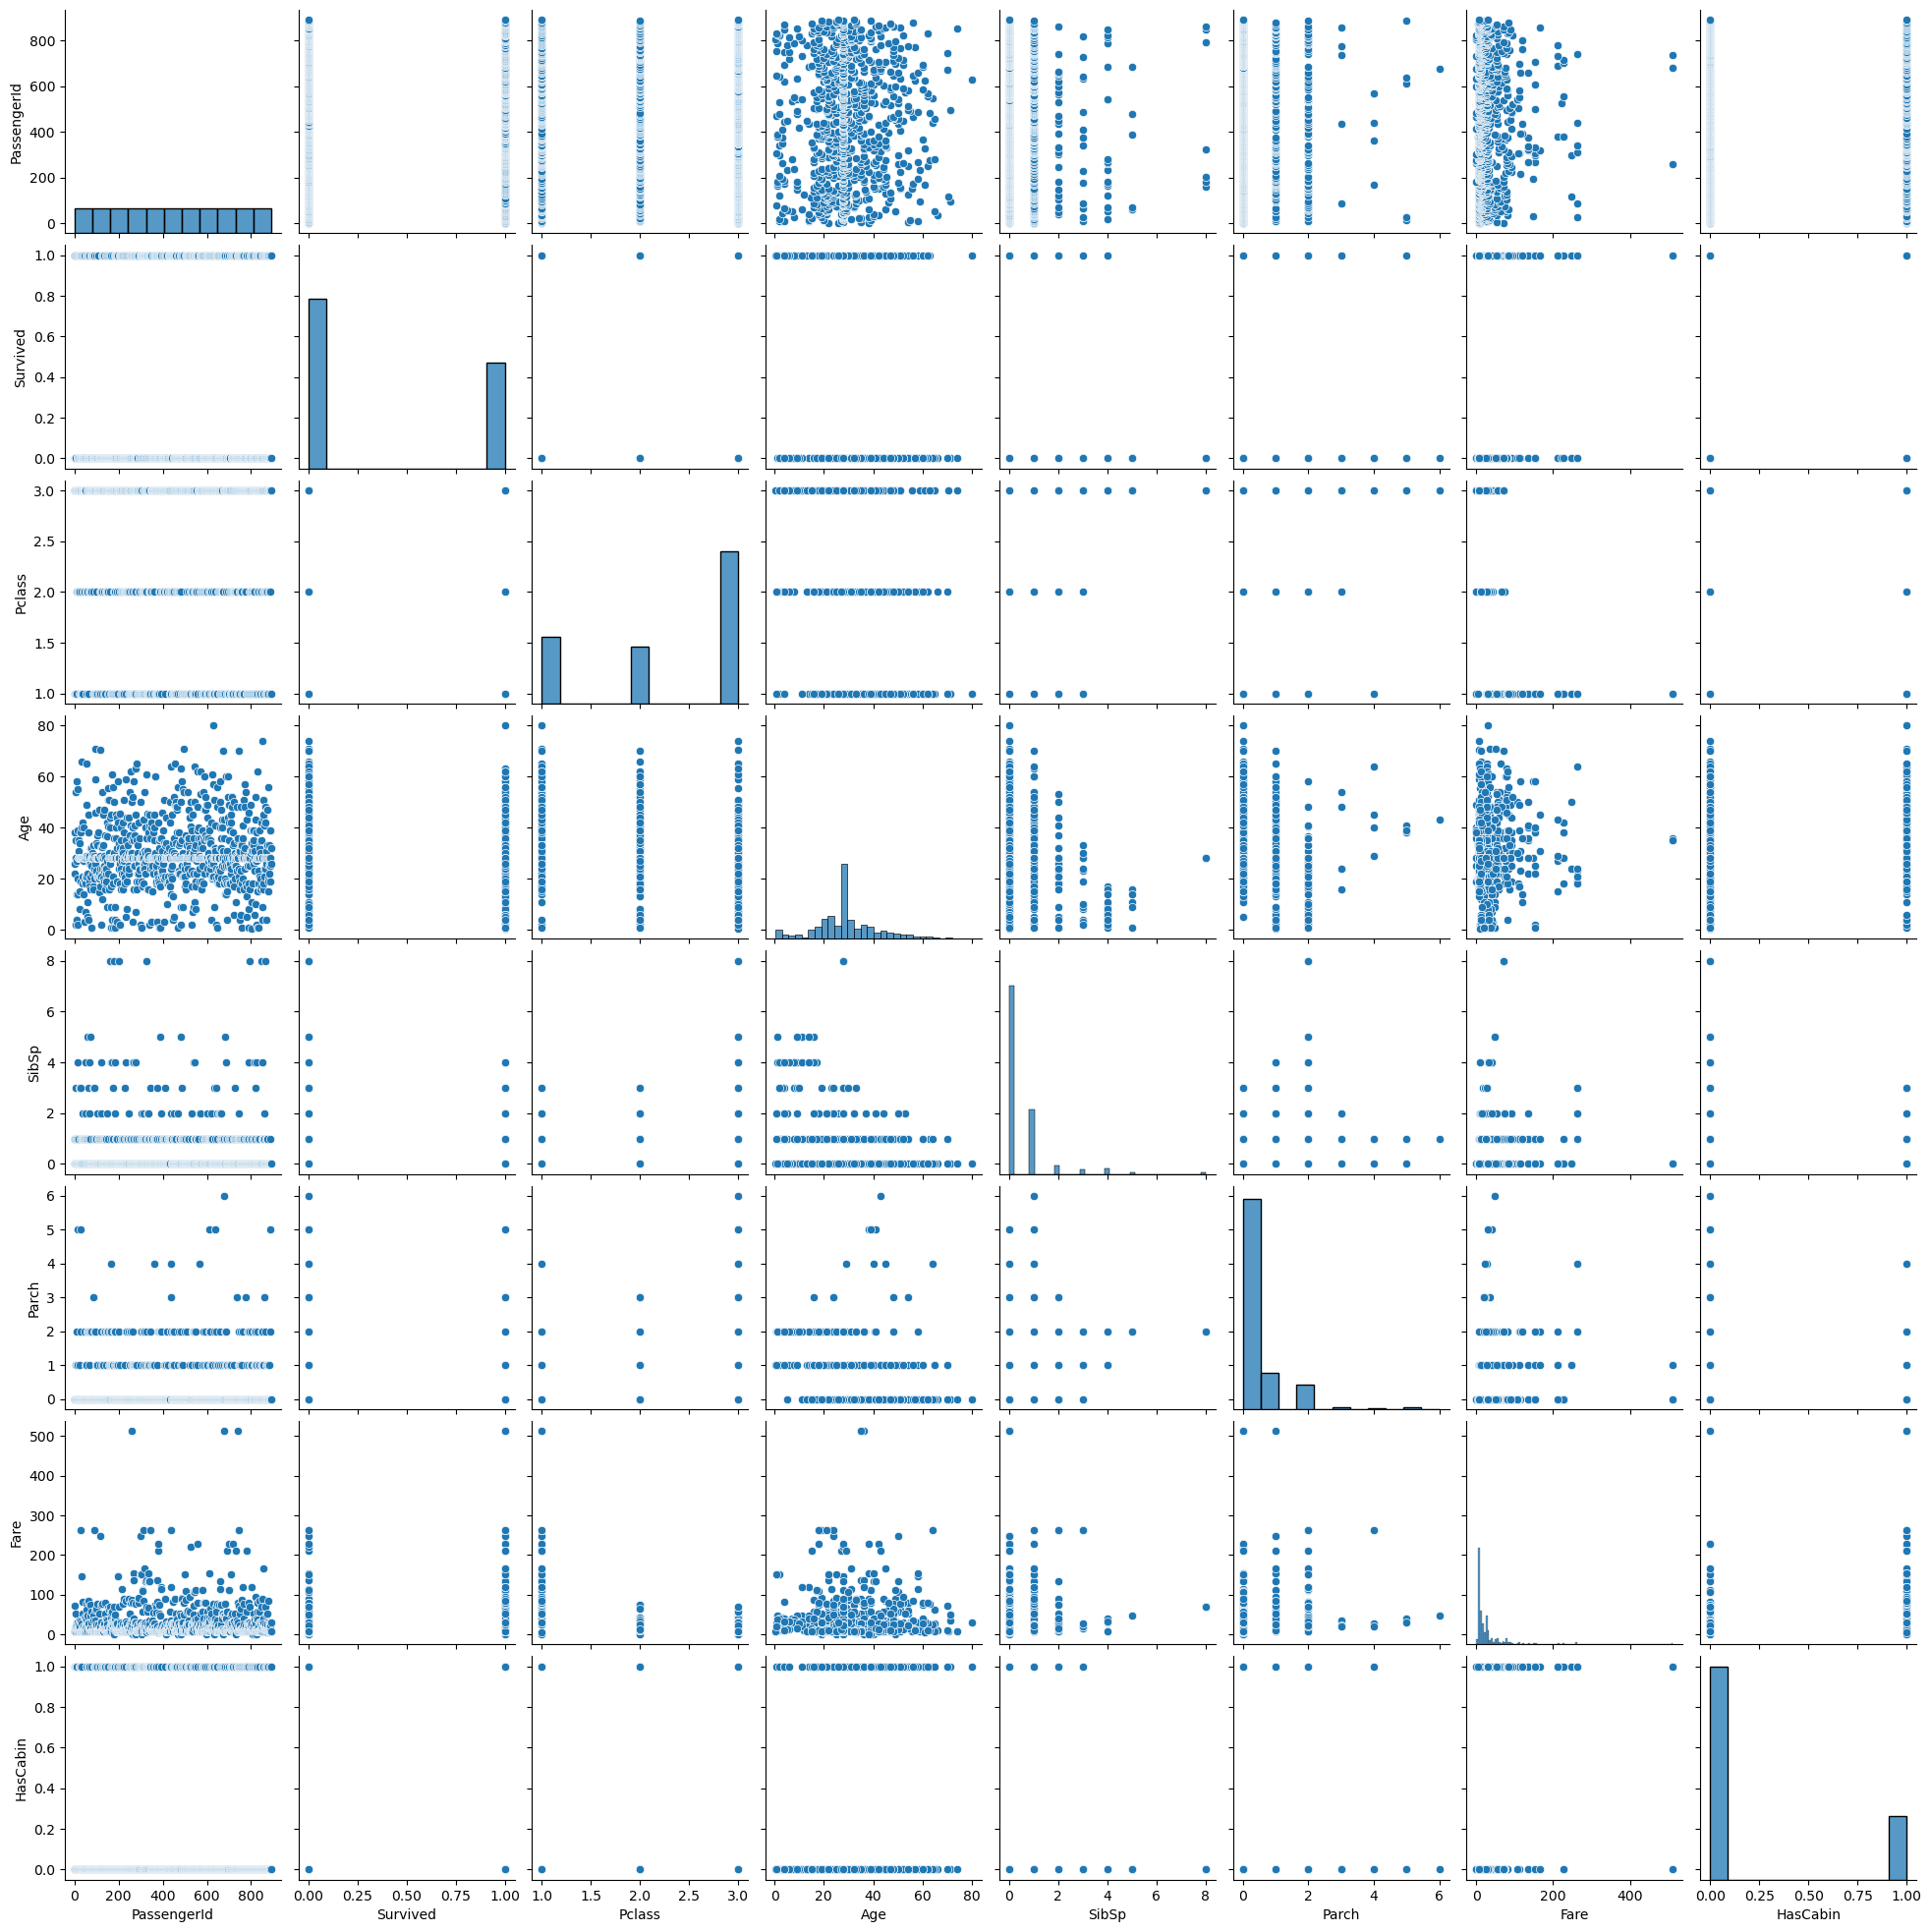

In [62]:
sns.pairplot(df)

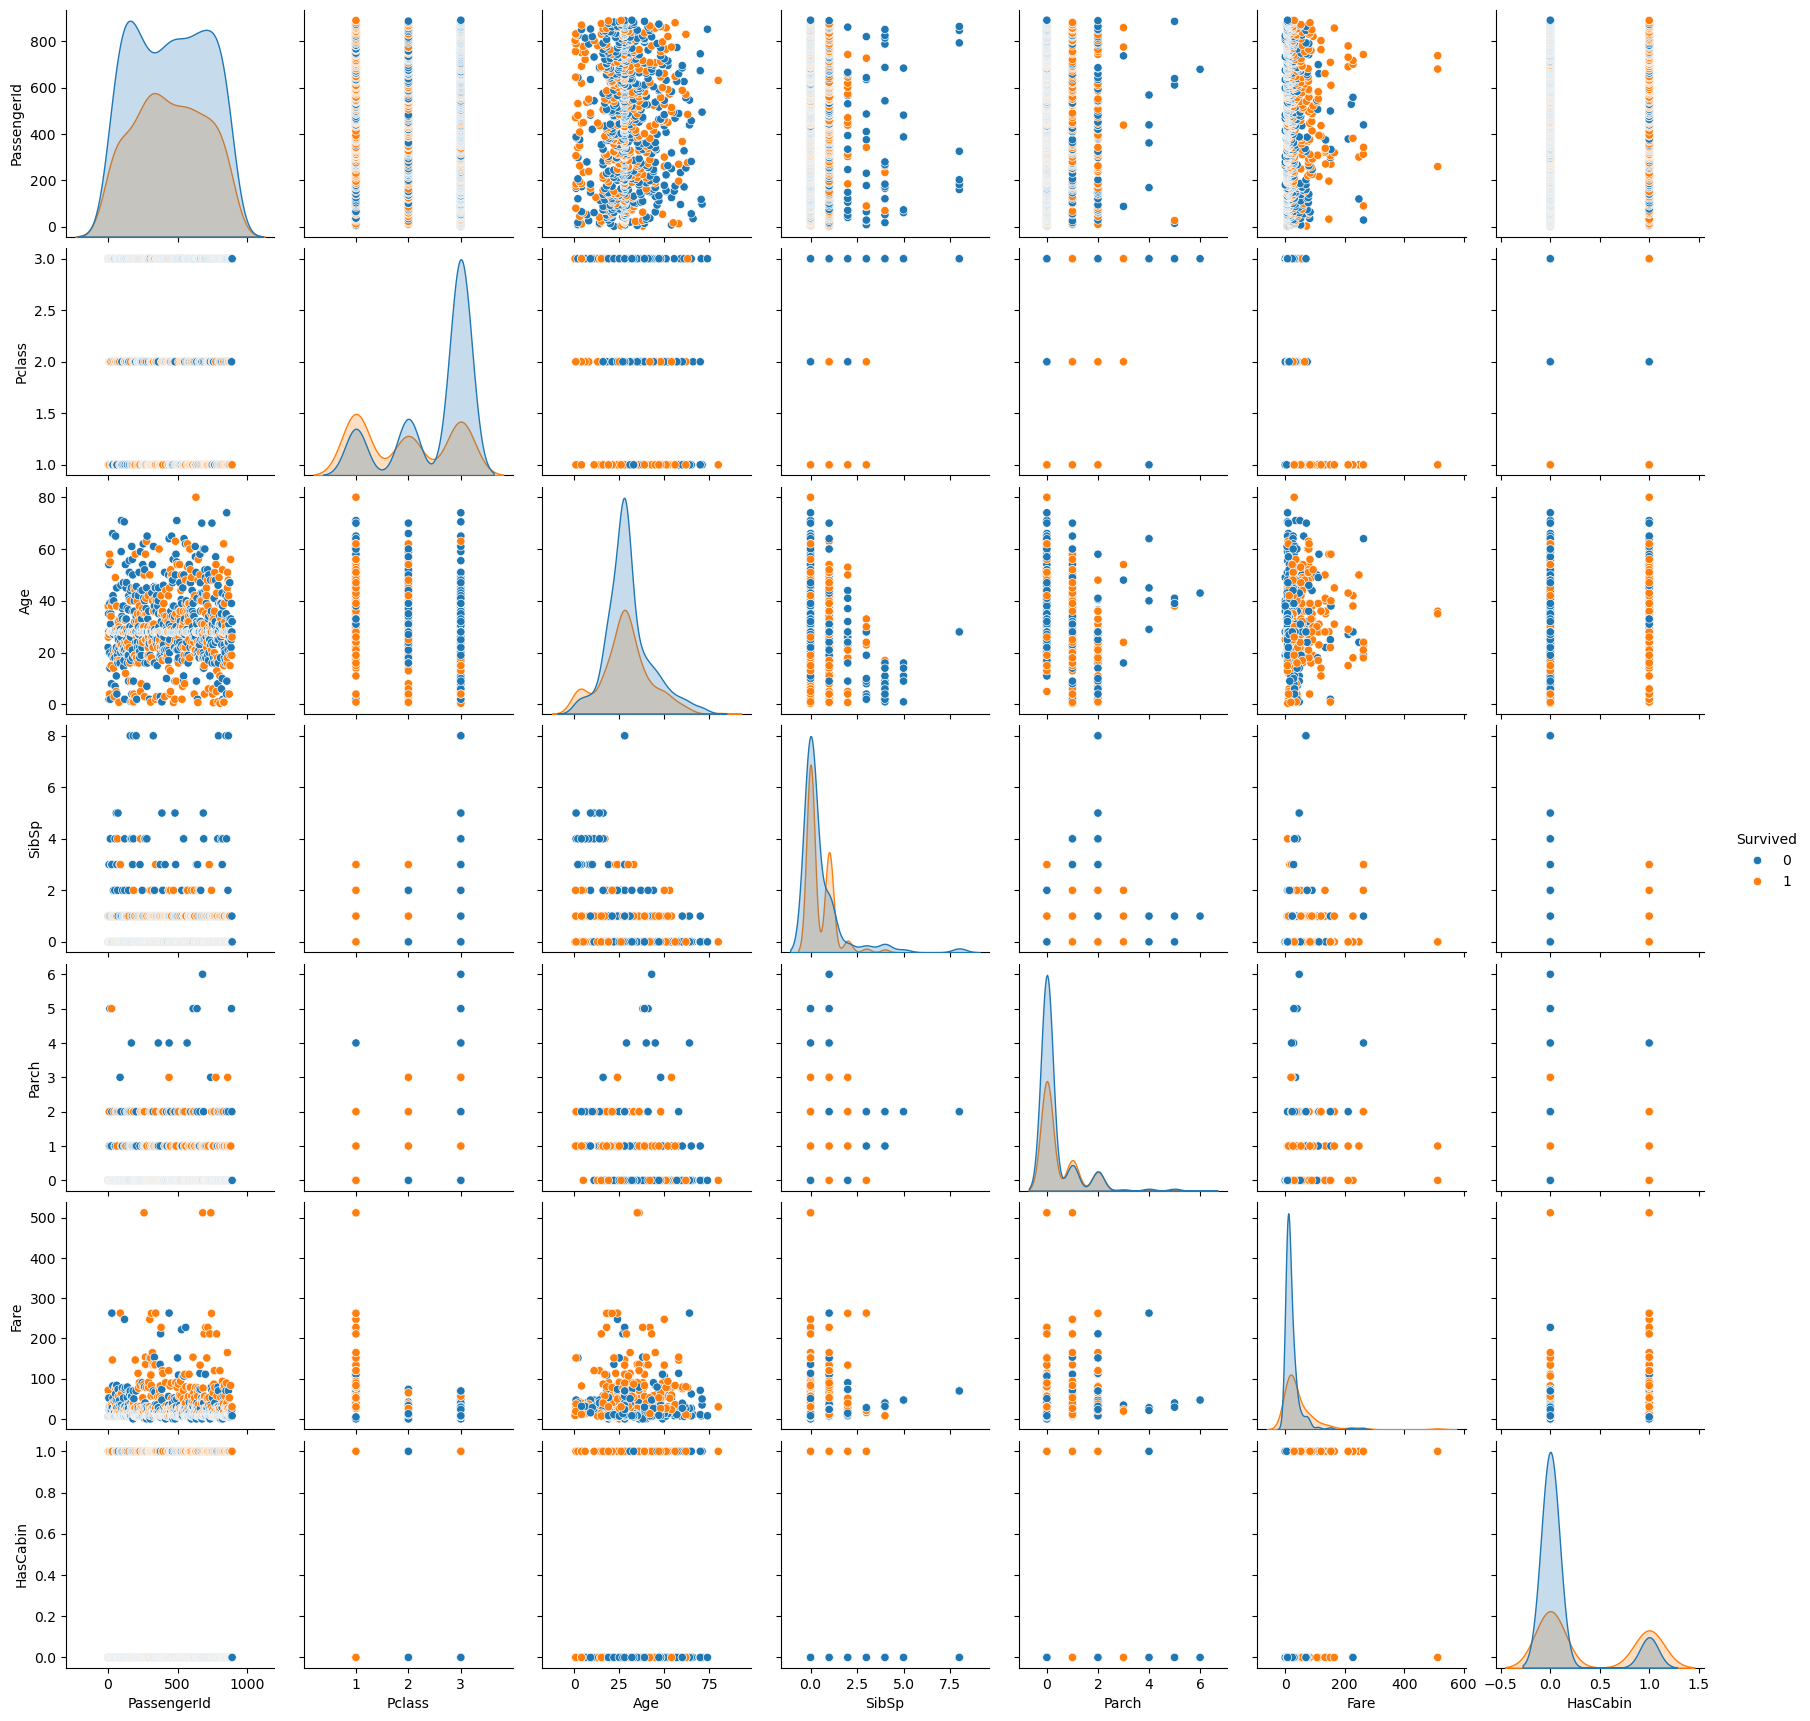

In [63]:
sns.pairplot(df,hue='Survived')